In [50]:
import numpy as np
import matplotlib.pylab as plt
import time
import pickle
from math import sqrt
from collections import defaultdict

np.set_printoptions(precision=2)
%matplotlib inline

In [51]:
filename = 'dict_mom_lasso_random_blocks.p'
with open(filename, 'rb') as f:
    dict_mom_lasso_random_blocks = pickle.load(f)

In [52]:
dict_mom_lasso_random_blocks.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69])

In [53]:
n_samples, n_features, sparsity, sigma, max_iter = 200, 500, 10, 1, 200
V = 5
grid_proportion_outliers = np.arange(0, 15, 1)/100
N_max = (1+np.max(grid_proportion_outliers))*n_samples
grid_lamda, grid_K = np.arange(0, 50, 4)/sqrt(N_max), np.arange(1, int(N_max/4), 4)

In [54]:
step= 69
error_lasso, error_mom_lasso, choice_lambda_lasso, choice_lambda_mom_lasso, choice_K_mom_lasso, list_ind_selected = dict_mom_lasso_random_blocks[step]

## Visualization of one step

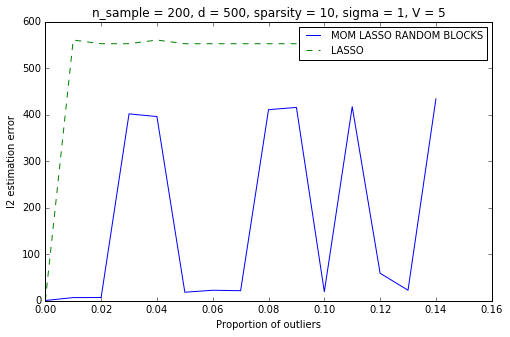

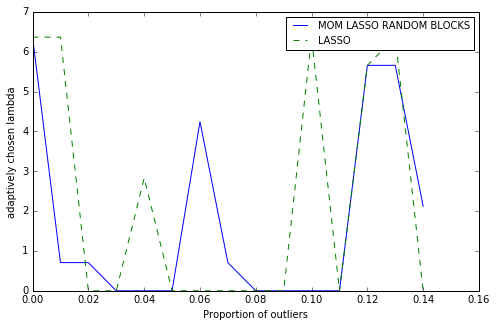

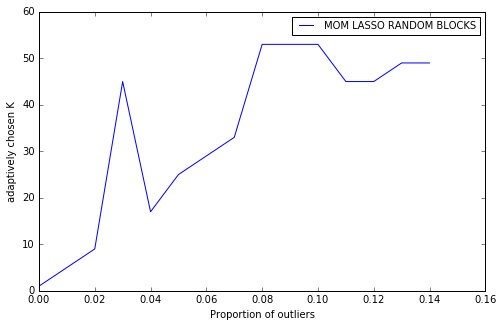

In [55]:
plt.figure(figsize=(8,5))
plt.plot(grid_proportion_outliers, error_mom_lasso, label = 'MOM LASSO RANDOM BLOCKS' )
plt.plot(grid_proportion_outliers, error_lasso, '--', label = 'LASSO')
plt.xlabel('Proportion of outliers')
plt.legend(loc=1, prop={'size':10})
plt.ylabel('l2 estimation error')
titre = 'n_sample = {}, d = {}, sparsity = {}, sigma = {}, V = {}'.format(n_samples, n_features, sparsity, sigma, V)
plt.title(titre)
filename = 'n{}_d{}_s{}_sigma{}_V{}_step{}.png'.format(n_samples, n_features, sparsity, sigma, V, step)
#plt.savefig(filename)
########plt 2
plt.figure(figsize=(8,5))
plt.plot(grid_proportion_outliers, choice_lambda_mom_lasso, label = 'MOM LASSO RANDOM BLOCKS') 
plt.plot(grid_proportion_outliers, choice_lambda_lasso, '--', label = 'LASSO' )
plt.xlabel('Proportion of outliers')
plt.legend(loc=1, prop={'size':10})
plt.ylabel('adaptively chosen lambda')
filename = 'CVlambda_n{}_d{}_s{}_sigma{}_V{}_step{}.png'.format(n_samples, n_features, sparsity, sigma, V, step)
#plt.savefig(filename)
##############plt 3
plt.figure(figsize=(8,5))
plt.plot(grid_proportion_outliers, choice_K_mom_lasso, label = 'MOM LASSO RANDOM BLOCKS') 
plt.xlabel('Proportion of outliers')
plt.legend(loc=1, prop={'size':10})
plt.ylabel('adaptively chosen K')
filename = 'CVK_n{}_d{}_s{}_sigma{}_V{}_step{}.png'.format(n_samples, n_features, sparsity, sigma, V, step)
#plt.savefig(filename) 

## Visualization of the average

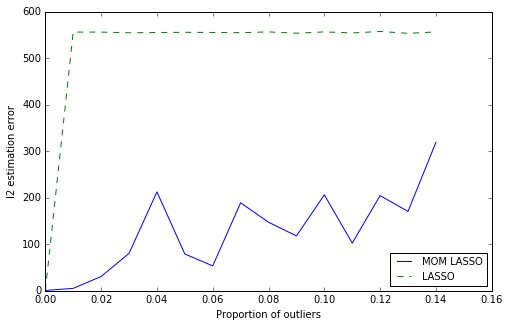

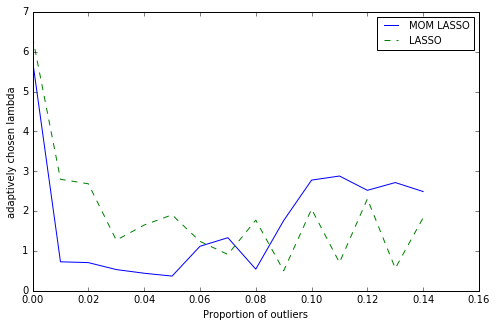

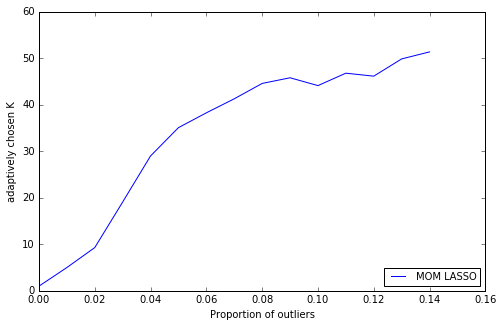

In [56]:
list_error_lasso = []
list_error_mom_lasso = []
list_error_lamda_lasso = []
list_error_lamda_mom_lasso = []
list_error_K_mom_lasso = []
list_ind_final = []
for i in dict_mom_lasso_random_blocks.keys():
    error_lasso, error_mom_lasso, choice_lambda_lasso, choice_lambda_mom_lasso, choice_K_mom_lasso, list_ind = dict_mom_lasso_random_blocks[i]
    list_error_lasso.append(error_lasso)
    list_error_mom_lasso.append(error_mom_lasso)
    list_error_lamda_lasso.append(choice_lambda_lasso)
    list_error_lamda_mom_lasso.append(choice_lambda_mom_lasso)
    list_error_K_mom_lasso.append(choice_K_mom_lasso)
    list_ind_final.append(list_ind)
    

mat_error_lasso = np.matrix(list_error_lasso)
mat_error_mom_lasso = np.matrix(list_error_mom_lasso)
mat_lamda_lasso = np.matrix(list_error_lamda_lasso)
mat_lamda_mom_lasso = np.matrix(list_error_lamda_mom_lasso)
mat_K_mom_lasso = np.matrix(list_error_K_mom_lasso)

plt.figure(figsize=(8,5))
plt.plot(grid_proportion_outliers, mat_error_mom_lasso.mean(0).T, label = 'MOM LASSO' )
plt.plot(grid_proportion_outliers, mat_error_lasso.mean(0).T, '--', label = 'LASSO')
plt.xlabel('Proportion of outliers')
plt.legend(loc=4, prop={'size':10})
plt.ylabel('l2 estimation error')
#titre = 'n_sample = {}, d = {}, sparsity = {}, sigma = {}, V = {}'.format(n_samples, n_features, sparsity, sigma, V)
#plt.title(titre)
filename = 'average_n{}_d{}_s{}_sigma{}_V{}_RB_1_70.png'.format(n_samples, n_features, sparsity, sigma, V)
plt.savefig(filename)
########plt 2
plt.figure(figsize=(8,5))
plt.plot(grid_proportion_outliers, mat_lamda_mom_lasso.mean(0).T, label = 'MOM LASSO') 
plt.plot(grid_proportion_outliers, mat_lamda_lasso.mean(0).T, '--', label = 'LASSO' )
plt.xlabel('Proportion of outliers')
plt.legend(loc=1, prop={'size':10})
plt.ylabel('adaptively chosen lambda')
filename = 'average_CVlambda_n{}_d{}_s{}_sigma{}_V{}_RB_1_70.png'.format(n_samples, n_features, sparsity, sigma, V)
plt.savefig(filename)
##############plt 3
plt.figure(figsize=(8,5))
plt.plot(grid_proportion_outliers, mat_K_mom_lasso.mean(0).T, label = 'MOM LASSO') 
plt.xlabel('Proportion of outliers')
plt.legend(loc=4, prop={'size':10})
plt.ylabel('adaptively chosen K')
filename = 'average_CVK_n{}_d{}_s{}_sigma{}_V{}_RB_1_70.png'.format(n_samples, n_features, sparsity, sigma, V)
plt.savefig(filename)

## Outliers_importance

In [41]:
from collections import defaultdict
def OUTLIERS_IMPORTANCE(list_ind_selected):
    dict_outliers_importance = defaultdict(int)
    for li in list_ind_selected:
        for ele in li:
            dict_outliers_importance[ele] += 1
    return dict_outliers_importance 

number of true outliers = 4.0


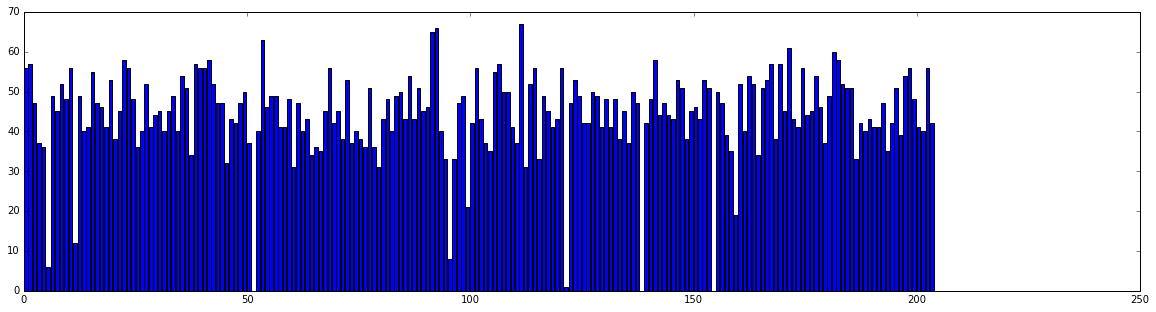

In [42]:
step_proportion_outliers = 2
dict_outliers_importance = OUTLIERS_IMPORTANCE(list_ind_selected[step_proportion_outliers])
print('number of true outliers = {}'.format(grid_proportion_outliers[step_proportion_outliers]*n_samples))
plt.figure(figsize = (20, 5))
plt.bar(dict_outliers_importance.keys(), dict_outliers_importance.values())
plt.show()